In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenhet".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenhet
-10.0 degrees Celsius = 14.0 degrees Fahrenhet
0.0 degrees Celsius = 32.0 degrees Fahrenhet
8.0 degrees Celsius = 46.0 degrees Fahrenhet
15.0 degrees Celsius = 59.0 degrees Fahrenhet
22.0 degrees Celsius = 72.0 degrees Fahrenhet
38.0 degrees Celsius = 100.0 degrees Fahrenhet


## 기계 학습 용어
Feature - 우리 모델의 입력입니다. 이 경우 단일 값 - 섭씨.

Labels - 우리 모델이 예측 한 결과. 이 경우 단일 값 - 화씨.

Example - 교육 중에 사용되는 입력 / 출력 쌍. 여기서는 (22,72)와 같은 특정 색인에서 celsius_q 및 fahrenhet_a의 값 쌍을 사용합니다.

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

In [5]:
model = tf.keras.Sequential([l0])

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


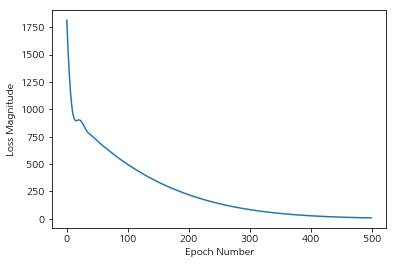

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [10]:
print(model.predict([100.0]))

[[211.33429]]


In [11]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.821119]], dtype=float32), array([29.22239], dtype=float32)]


This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.


In [12]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.23180507, -0.22789064,  0.3724187 , -0.05467891]],
      dtype=float32), array([-3.1764245, -1.7496759,  3.1842892, -0.7949047], dtype=float32)]
These are the l1 variables: [array([[ 0.9984504 , -0.37230918,  1.0151936 , -0.6414817 ],
       [ 0.6593888 , -0.29649854, -0.00878615, -0.24134186],
       [-0.56713885, -0.00802263, -1.142173  , -0.5121851 ],
       [ 0.32451832, -0.03329323, -0.18587658,  0.2306027 ]],
      dtype=float32), array([-3.1137786,  2.352849 , -3.1480637, -0.5618372], dtype=float32)]
These are the l2 variables: [array([[-1.3538195 ],
       [ 0.7391206 ],
       [-1.323638  ],
       [-0.21592942]], dtype=float32), array([3.0747936], dtype=float32)]
